In [1]:
#Library installation
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install spicy
!pip install sklearn
!pip install researchpy

In [2]:
!pip install requests

In [3]:
#Database Libraries
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

In [4]:
#Libraries used throughout
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import pymysql

In [5]:
#Database Connection
conn=pymysql.connect(host='10.121.44.79' ,port=int(3306),user='root',passwd='abcd@1234',db='helnis')
dataframe=pd.read_sql_query("SELECT * FROM prices ",conn)
print(dataframe)

        id       Dates  KSE_Price  Oil_Price  Gold_Price  Interest_Rate
0        1  2022-06-17      0.581      0.264       0.972          0.993
1        2  2022-06-15      0.554      0.223       0.982          1.000
2        3  2022-06-14      0.539      0.217       0.959          0.999
3        4  2022-06-13      0.532      0.209       0.956          0.998
4        5  2022-06-06      0.559      0.201       0.942          0.993
...    ...         ...        ...        ...         ...            ...
1484  1485  2016-01-08      0.207      0.488       0.217          0.048
1485  1486  2016-01-07      0.213      0.495       0.216          0.050
1486  1487  2016-01-06      0.224      0.508       0.174          0.050
1487  1488  2016-01-04      0.225      0.522       0.173          0.052
1488  1489  2016-01-01      0.234      0.520       0.122          0.052

[1489 rows x 6 columns]


C:\Users\faaiz.asif\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
df1=pd.DataFrame()
df1['Date']=dataframe['Dates']
df1.head()

,Date
0,2022-06-17
1,2022-06-15
2,2022-06-14
3,2022-06-13
4,2022-06-06


In [7]:
dataframe.drop('id', inplace=True, axis=1)
dataframe.drop('Dates', inplace=True, axis=1)
dataframe.head()

,KSE_Price,Oil_Price,Gold_Price,Interest_Rate
0,0.581,0.264,0.972,0.993
1,0.554,0.223,0.982,1.000
2,0.539,0.217,0.959,0.999
3,0.532,0.209,0.956,0.998
4,0.559,0.201,0.942,0.993


In [8]:
#Building of correlation matrix
corrMatrix=dataframe.corr()

In [9]:
#Printing of matrix
print(corrMatrix)

               KSE_Price  Oil_Price  Gold_Price  Interest_Rate
KSE_Price       1.000000   0.516450    0.085548      -0.370431
Oil_Price       0.516450   1.000000   -0.723274      -0.717493
Gold_Price      0.085548  -0.723274    1.000000       0.440946
Interest_Rate  -0.370431  -0.717493    0.440946       1.000000


In [10]:
frames=[df1,dataframe]
df2=pd.concat(frames,axis=1)
df2.head()

,Date,KSE_Price,Oil_Price,Gold_Price,Interest_Rate
0,2022-06-17,0.581,0.264,0.972,0.993
1,2022-06-15,0.554,0.223,0.982,1.000
2,2022-06-14,0.539,0.217,0.959,0.999
3,2022-06-13,0.532,0.209,0.956,0.998
4,2022-06-06,0.559,0.201,0.942,0.993


In [11]:
df2['Date']= pd.to_datetime(df2['Date']) 
result=pd.DataFrame()
result['KSEPrice'] = df2.groupby([df2['Date'].dt.year]).agg({'KSE_Price': ['mean']})
result['OilPrice'] = df2.groupby([df2['Date'].dt.year]).agg({'Oil_Price': ['mean']})
result['GoldPrice'] = df2.groupby([df2['Date'].dt.year]).agg({'Gold_Price': ['mean']})
result['InterestRate'] = df2.groupby([df2['Date'].dt.year]).agg({'Interest_Rate': ['mean']})
result.reset_index(inplace=True)
# result=result.rename(columns={'index':'Date'})
result.head(20)

,Date,KSEPrice,OilPrice,GoldPrice,InterestRate
0,2016,0.410188,0.671430,0.183444,0.021803
1,2017,0.714958,0.806434,0.190802,0.016080
2,2018,0.581289,0.661872,0.260434,0.179540
3,2019,0.344574,0.314434,0.437561,0.722053
4,2020,0.431850,0.297707,0.686699,0.344122
5,2021,0.730320,0.457402,0.705328,0.220254
6,2022,0.667518,0.257353,0.874388,0.693612


In [42]:
result.KSEPrice = result.KSEPrice.round(3)
result.OilPrice = result.OilPrice.round(3)
result.GoldPrice = result.GoldPrice.round(3)
result.InterestRate = result.InterestRate.round(3)
result.head()

,Date,KSEPrice,OilPrice,GoldPrice,InterestRate
0,2016,0.410,0.671,0.183,0.022
1,2017,0.715,0.806,0.191,0.016
2,2018,0.581,0.662,0.260,0.180
3,2019,0.345,0.314,0.438,0.722
4,2020,0.432,0.298,0.687,0.344


In [43]:
#Building of API using flask
from flask import Flask,jsonify
import json
from werkzeug.wrappers import Request, Response
import os

In [44]:
app=Flask(__name__)  

In [45]:
#Converting dataframe to dictionary
# result.set_index("Date", drop=True, inplace=True)
dictionary = result.to_dict('records')
print(dictionary)

[{'Date': 2016, 'KSEPrice': 0.41, 'OilPrice': 0.671, 'GoldPrice': 0.183, 'InterestRate': 0.022}, {'Date': 2017, 'KSEPrice': 0.715, 'OilPrice': 0.806, 'GoldPrice': 0.191, 'InterestRate': 0.016}, {'Date': 2018, 'KSEPrice': 0.581, 'OilPrice': 0.662, 'GoldPrice': 0.26, 'InterestRate': 0.18}, {'Date': 2019, 'KSEPrice': 0.345, 'OilPrice': 0.314, 'GoldPrice': 0.438, 'InterestRate': 0.722}, {'Date': 2020, 'KSEPrice': 0.432, 'OilPrice': 0.298, 'GoldPrice': 0.687, 'InterestRate': 0.344}, {'Date': 2021, 'KSEPrice': 0.73, 'OilPrice': 0.457, 'GoldPrice': 0.705, 'InterestRate': 0.22}, {'Date': 2022, 'KSEPrice': 0.668, 'OilPrice': 0.257, 'GoldPrice': 0.874, 'InterestRate': 0.694}]


In [46]:
import json 
with open("all_prices.json", "w") as outfile:
    json.dump(dictionary, outfile)

In [47]:
matrix=corrMatrix.unstack().to_dict()
result1=str(matrix)
print(result1)

{('KSE_Price', 'KSE_Price'): 1.0, ('KSE_Price', 'Oil_Price'): 0.516450424146182, ('KSE_Price', 'Gold_Price'): 0.08554759619795106, ('KSE_Price', 'Interest_Rate'): -0.3704313076545383, ('Oil_Price', 'KSE_Price'): 0.516450424146182, ('Oil_Price', 'Oil_Price'): 1.0, ('Oil_Price', 'Gold_Price'): -0.723273689740656, ('Oil_Price', 'Interest_Rate'): -0.717492937121084, ('Gold_Price', 'KSE_Price'): 0.08554759619795106, ('Gold_Price', 'Oil_Price'): -0.723273689740656, ('Gold_Price', 'Gold_Price'): 1.0, ('Gold_Price', 'Interest_Rate'): 0.4409460278392986, ('Interest_Rate', 'KSE_Price'): -0.3704313076545383, ('Interest_Rate', 'Oil_Price'): -0.717492937121084, ('Interest_Rate', 'Gold_Price'): 0.4409460278392986, ('Interest_Rate', 'Interest_Rate'): 1.0}


In [48]:
list1=[]
list1=dataframe.corr().stack().rename_axis(('Factor1', 'Factor2')).reset_index(name='Relation_Value')
list1['index1']=list1.index
print(list1)
# print(list1['Relation_Value'][0])

          Factor1        Factor2  Relation_Value  index1
0       KSE_Price      KSE_Price        1.000000       0
1       KSE_Price      Oil_Price        0.516450       1
2       KSE_Price     Gold_Price        0.085548       2
3       KSE_Price  Interest_Rate       -0.370431       3
4       Oil_Price      KSE_Price        0.516450       4
5       Oil_Price      Oil_Price        1.000000       5
6       Oil_Price     Gold_Price       -0.723274       6
7       Oil_Price  Interest_Rate       -0.717493       7
8      Gold_Price      KSE_Price        0.085548       8
9      Gold_Price      Oil_Price       -0.723274       9
10     Gold_Price     Gold_Price        1.000000      10
11     Gold_Price  Interest_Rate        0.440946      11
12  Interest_Rate      KSE_Price       -0.370431      12
13  Interest_Rate      Oil_Price       -0.717493      13
14  Interest_Rate     Gold_Price        0.440946      14
15  Interest_Rate  Interest_Rate        1.000000      15


In [49]:
json_df=pd.DataFrame()
json_df=list1
json_df.drop(labels='index1', inplace=True, axis=1)
json_df.Relation_Value = json_df.Relation_Value.round(3)
# json_df['Relation_Value'].round(3)
json_df.head()
json_df.to_json('relation_file.json', orient = 'split', compression = 'infer', index = 'true')

In [50]:
@app.route('/')
def index():
    return "Calling the API"

In [20]:
@app.route('/prices', methods=['GET'])
def get_prices():
    return jsonify(dictionary)

In [21]:
@app.route('/matrix', methods=['GET'])
def get_relation():
    return jsonify({'Correlation':result1})

In [22]:
@app.route('/matrix/<int:id>', methods=['GET'])
def get_singlerelation(id):
    relation_val=list1['Relation_Value'][id]
    return jsonify({'Correlation':relation_val})

In [23]:
@app.route("/prices/<int:id>", methods=['GET'])
def get_yearprice(id):
  return jsonify(dictionary[id])

In [24]:
if __name__=="__main__":
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Jul/2022 14:52:18] "GET /prices HTTP/1.1" 200 -


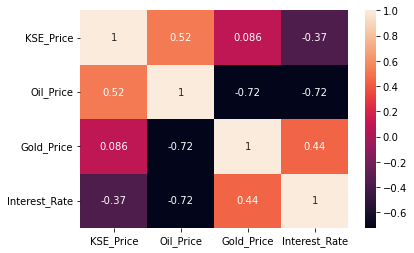

In [25]:
#Visualization of Correlation Matrix
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [26]:
#Line plot of yearly
import matplotlib.pyplot as mp
result.plot(x="Date", y=[ "Interest Rate", "Oil Price"],
        kind="line", figsize=(10, 10))
mp.show()


KeyboardInterrupt



In [ ]:
#Histogram plot of yearly
result.plot(x="Date", y=[ "Gold Price", "Oil Price"], kind="bar", figsize=(10, 10))
mp.show()